# **Machine Learning Models for Product Categorization**

In this notebook, several famous Machine Learning models are trained on the unbalanced dataset, balanced dataset using oversampling and balanced dataset using undersampling in order to check which gives the best accuracy. These models are then then evaluated with the help of Classification Report, Confusion Matrix, ROC Curves, Accuracy Score, etc.

The ML Models are trained for all the 3 datasets in the following order:


1.   Imbalanced Dataset
2.   Balanced Dataset (using Oversampling)
3.   Balanced Dataset (using Undersampling)



### ***Machine Learning Models Used:***
* Logistic Regression (both Binary and Multiclass Variants)
* Multinomial Naive Bayes
* Linear Support Vector Machine
* Decision Trees Classifier
* Random Forest Classifier 
* K Nearest Neighbours
 


 



## **Importing the required libraries**

In [1]:
#importing the libraries for matrix and dataframe handling, plotting, etc 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing the other miscellaneous libraries used 
import re
import warnings
warnings.filterwarnings("ignore")

# importing the NLTK related libraries and functions along with evaluation metircs
import nltk
import string
nltk.download("all")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## **PART 1) Reading the Imbalanced Dataset**

The dataset that was saved from the earlier [Notebook](https://colab.research.google.com/drive/1Ht6pbVFlkudK7PzrDPmepiytHxPyhVBe?usp=sharing) in the form of a csv file is loaded below in the form of a Pandas dataframe. This dataset consists of noise as well as those products which belong to the 13 primary categories. The noise is then removed in the following steps. The Product Description in this dataset has already been cleaned in the previous notebook (lowercasing, stopword removal, tokenization,lemmatization, etc).

In [3]:
unbalanced_df = pd.read_csv('/content/drive/MyDrive/Flipkart Product Dataset/unbalanced_products.csv')
unbalanced_df.head(15)

,Unnamed: 0,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,0,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.143750,410,key feature alisha solid woman cycling short c...
1,1,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.113814,4433,fabhomedecor fabric double sofa bed finish col...
2,2,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",Key Features of AW Bellies Sandals Wedges Heel...,AW,footwear,1,0.027778,650,key feature belly sandal wedge heel casualsaw ...
3,3,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.122917,403,key feature alisha solid woman cycling short c...
4,4,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",Specifications of Sicons All Purpose Arnica Do...,Sicons,petsupplies,1,0.050000,248,specification sicons purpose arnica dog shampo...
5,5,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",Key Features of Eternal Gandhi Super Series Cr...,Eternal Gandhi,noise,0,0.322727,872,key feature eternal gandhi super series crysta...
6,6,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.127778,416,key feature alisha solid woman cycling short c...
7,7,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",FabHomeDecor Fabric Double Sofa Bed (Finish Co...,FabHomeDecor,homefurnishing/kitchen,1,0.135063,4385,fabhomedecor fabric double sofa bed finish col...
8,8,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...","Key Features of dilli bazaaar Bellies, Corpora...",dilli bazaaar,footwear,1,-0.032143,428,key feature dilli bazaaar belly corporate casu...
9,9,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",Key Features of Alisha Solid Women's Cycling S...,Alisha,clothing,1,0.098333,419,key feature alisha solid woman cycling short c...


**Encoding of the Product Classes**

In order to plot the ROC Curves and find the AUC score, there was a need to have a proper encoding for the 13 primary categories (in both directions). Hence, two of the following dictionaries are created to create a mapping.

In [4]:
#helper dictionaries created which are later used to manipulate the testing output into suitable form before plotting the ROC Curves

category_mapping = {  0	: "homefurnishing/kitchen",
                      1	: "clothing",
                      2	: "jewellery",
                      3	: "personalaccessories",	
                      4	: "electronics",	
                      5	: "footwear",	
                      6	: "automotive",	
                      7	: "toys&schoolsupplies",
                      8	: "tools&hardware",	
                      9	: "babycare",	
                      10 : "sports&fitness",	
                      11 : "petsupplies",	
                      12 : "ebooks"	}

reverse_category_mapping = {"homefurnishing/kitchen":0,
                            "clothing":1,
                            "jewellery":2,
                            "personalaccessories":3,	
                            "electronics":4,	
                            "footwear":5,	
                            "automotive":6,	
                            "toys&schoolsupplies":7,
                            "tools&hardware":8,	
                            "babycare":9,	
                            "sports&fitness":10,	
                            "petsupplies":11,	
                            "ebooks":12}


**Removing the noise from the dataset**



In [5]:
#dropping the noise in the dataset by considering only the above mentioned categories

print(unbalanced_df.shape)
unbalanced_df = unbalanced_df[unbalanced_df["main_category"]==1]
print(unbalanced_df.shape)

(17539, 10)
(17209, 10)


## **Functions involving the Training and Evaluation of several Machine Learning Models**

For each of the 6 ML algorithms stated above, functions are created. The following are the steps that are performed across all the functions:



1. Splitting of the dataset randomly into training and test dataset with the help of train_test_split function
2. Bag of Words model of the training dataset is created to represent the text data into numbers that can be interpreted by the model
3. Then these are converted to he corresponding TF-IDF vectors (as these perform better in terms of ML Models)
4. Fitting the training dataset to the Machine Learning Model
5. Predicting the Output for the testing Dataset
6. Calculating the Accuracy of the Predicted categories as compared to the actual categories in the testing dataset
7. Evaluation Metrics such as Confusion Matrix and Classification Report are printed to get an in depth idea about the accuracy of our model 



## **1) Logistic Regression (Binary Classification Method)**

In [6]:
def logistic_regression(x,y):
  from sklearn.linear_model import LogisticRegression

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  lr_model = LogisticRegression()
  lr_model.fit(x_train,y_train)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

## **2) Logistic Regression (Multiclass Classification Method)**

This multiclass classification model has also been trained in order to help us plot the ROC Curves and get the AUC Score to help us get an idea about the accuracy of our model.

In [56]:
def logistic_regression_multiclass(x,y):
  from sklearn.linear_model import LogisticRegression

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  reg = 0.1

  #fitting the training dataset to the multiclass classification Logistic Regression model
  lr_model = LogisticRegression(C=1/reg, solver='lbfgs', multi_class='auto', max_iter=1000).fit(x_train,y_train)
  lr_predict = lr_model.predict(x_test)
  lr_pred_prob = lr_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, lr_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,lr_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,lr_predict))

  return y_test, lr_predict, lr_pred_prob

## **3) Multinomial Naive Bayes Classifier**

In [8]:
def naive_bayes(x,y):
  from sklearn.naive_bayes import MultinomialNB

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the tarining dataset to the model
  nb_model = MultinomialNB()
  nb_model.fit(x_train,y_train)
  nb_predict = nb_model.predict(x_test)
  nb_pred_prob = nb_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, nb_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,nb_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,nb_predict))

  return y_test, nb_predict, nb_pred_prob

## **4) Linear Support Vector Machine**

In [9]:
def linear_svm(x,y):
  from sklearn.svm import LinearSVC

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  svc_model = LinearSVC(random_state=42, max_iter=2000)
  svc_model.fit(x_train,y_train)
  svc_predict = svc_model.predict(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, svc_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,svc_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,svc_predict))

  return y_test, svc_predict

## **5) Decision Trees Classifier**

In [10]:
def decision_trees(x,y):
  from sklearn.tree import DecisionTreeClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  dtree_model = DecisionTreeClassifier(max_depth = 30)
  dtree_model.fit(x_train,y_train)
  dtree_predict = dtree_model.predict(x_test)
  dtree_pred_prob = dtree_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, dtree_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test,dtree_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test,dtree_predict))

  return y_test, dtree_predict, dtree_pred_prob

## **6) Random Forest Classifier**

In [11]:
def random_forest(x,y):
  from sklearn.ensemble import RandomForestClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  rfc_model = RandomForestClassifier(random_state=42, max_depth = 30)
  rfc_model.fit(x_train,y_train)
  rfc_predict = rfc_model.predict(x_test)
  rfc_pred_prob = rfc_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, rfc_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test, rfc_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test, rfc_predict))

  return y_test, rfc_predict, rfc_pred_prob

## **7) K Nearest Neighbours**

In [12]:
def k_nearest_neighbours(x,y):
  from sklearn.neighbors import KNeighborsClassifier

  #splitting the dataset into training and test parts
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

  #bag of words implmentation
  cv = CountVectorizer()
  x_train = cv.fit_transform(x_train).toarray()

  #TF-IDF implementation
  vector = TfidfTransformer()
  x_train = vector.fit_transform(x_train).toarray()
  x_test = cv.transform(x_test)

  #fitting the training dataset to the model
  knn_model = KNeighborsClassifier(algorithm='brute')
  knn_model.fit(x_train,y_train)
  knn_predict = knn_model.predict(x_test)
  knn_pred_prob = knn_model.predict_proba(x_test)

  #evaluation metrics for the dataset
  print("Validation Accuracy: ",accuracy_score(y_test, knn_predict))

  print("\n")
  print("*********** CONFUSION MATRIX **************")
  print(confusion_matrix(y_test, knn_predict))

  print("\n")
  print("*********** CLASSIFICATION REPORT **************")
  print(classification_report(y_test, knn_predict))

  return y_test, knn_predict, knn_pred_prob

## **Plotting the ROC Curves for Multiclass Logistic Regression**

The ROC Curves are plotted and the corresponding AUC score for each of the categories has been plotted to get an idea about the accuracy of the model. Later, an aggregate AUC Score is also calculated which an average for all the categories' One VS Rest ROC Curves.

In [70]:
def plot_roc_curve(y_test, y_pred, no_categories = 13, lw=2):

  #calculating the ROC curve and area for each class
  false_positive_rate = dict()
  true_positive_rate = dict()

  for i in range(no_categories):
    false_positive_rate[i], true_positive_rate[i], _ = roc_curve(y_test[:,i], y_pred[:, i])

  #Compute micro-average ROC curve and area under the curve
  false_positive_rate["micro"], true_positive_rate["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())

  #plotting the ROC Curves for each of the 13 main categories in our model
  for category in range(no_categories):
    plt.figure()
    plt.plot(false_positive_rate[category], 
             true_positive_rate[category], 
             color='deeppink',
             lw=lw)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Primary Category: ' + category_mapping[category])
  plt.show()

## **Evaluation of the ML Model on unbalanced testing dataset**

The above mentioned functions are called and for each of the 6 algorithms, evaluation metrics are printed. This helps us in understanding which ML Model performs the best.

In [83]:
# the cleaned product description corresponds to the x value 
x = unbalanced_df['cleaned_desc']
# the 13 labels/ product categories mentioned above correspond to the y value
y = unbalanced_df['primary_categories']

**1) Evaluation using the Logistic Regression Model**

In [15]:
print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9654270772806508


*********** CONFUSION MATRIX **************
[[ 200    0    1    0    2    0    0    0    0    0    0    0    0]
 [   0   56    1    0    0    0    6    0    2    0    1    0    0]
 [   0    7 1096    0    0    0    2    2    1    0    1    0    0]
 [   0    0    0    1    1    0    2    0    0    0    0    0    0]
 [   2    0    0    0  250    0    0    0    0    0    0    0    0]
 [   0    0    2    0    2  198    0    0    0    0    0    0    0]
 [   0    9    1    0   12    2  412    3    1    0    0    5    8]
 [   0    0    0    0    4    0    0  585    1    0    0    0    0]
 [   0    0    3    0    1    2    3    2  320    0    2    0    2]
 [   0    0    0    0    0    0    0    0    0    5    0    0    0]
 [   0    0    0    0    0    0    1    0    4    0   25    0    0]
 [   2    0    0    0    1    0    1    0    1    0    0   58    1]
 [   3    0    0    0    1    1    2    0    4    0    

**2) Evaluation using the Multiclass Variant of Logistic Regression**

In [84]:
print("********** MULTICLASS LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** MULTICLASS LOGISTIC REGRESSION **********
Validation Accuracy:  0.97356188262638


*********** CONFUSION MATRIX **************
[[ 202    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0   58    1    0    0    0    4    0    2    0    0    0    1]
 [   0    7 1097    0    0    0    1    2    1    0    1    0    0]
 [   0    0    0    2    0    0    2    0    0    0    0    0    0]
 [   2    0    0    0  250    0    0    0    0    0    0    0    0]
 [   0    0    0    0    2  200    0    0    0    0    0    0    0]
 [   1    9    1    0    8    0  419    2    1    0    0    4    8]
 [   0    0    0    0    3    0    0  586    1    0    0    0    0]
 [   0    1    2    0    1    1    3    2  322    0    1    0    2]
 [   0    0    0    0    0    0    0    0    0    5    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0   29    0    0]
 [   1    0    0    0    0    0    1    0    1    0    0   61    0]
 [   3    0    0    0    1    0    1    0    3

### **Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them**

In [85]:
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (3442,)
PREDICTED LABELS: (3442,)
PROBABILITY OF THE PREDICTED LABELS: (3442, 13)


In [86]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [1 4 6 1 1 1 4 1 2 2]
The last 10 predicted labels: [1 4 6 1 1 1 4 1 2 2]


In [87]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


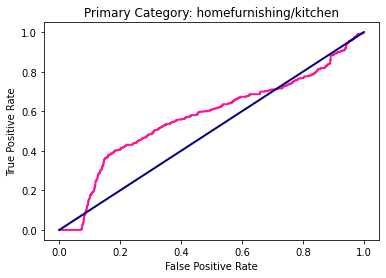

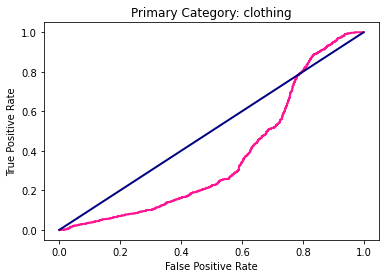

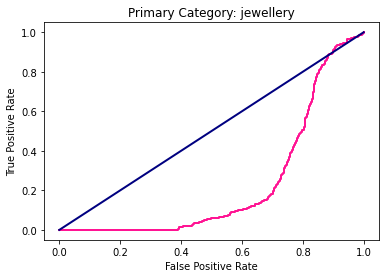

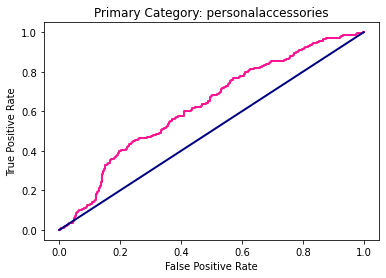

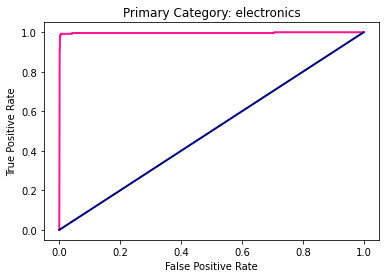

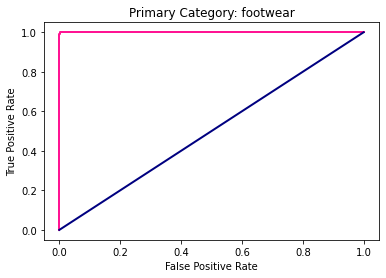

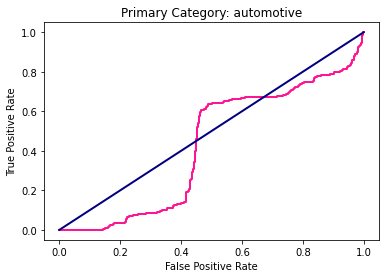

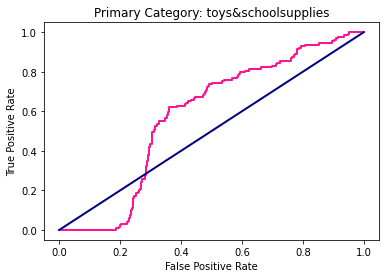

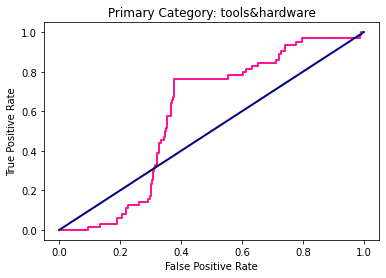

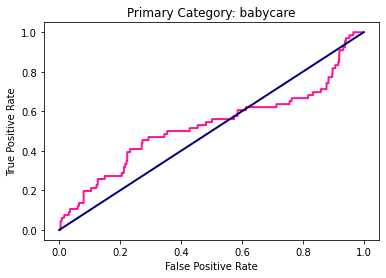

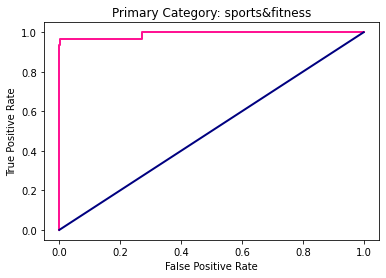

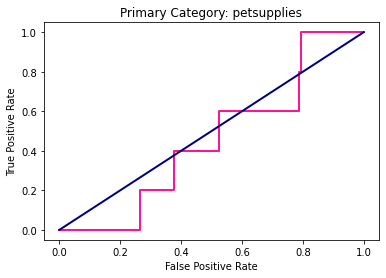

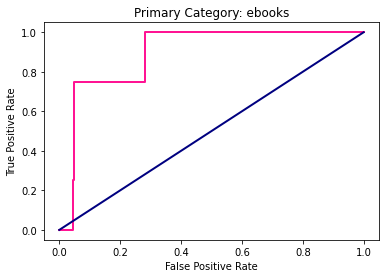

In [88]:
plot_roc_curve(y_test, lr_pred_prob)

**Average Area Under the Curve**

The aggregate area under the curve score that is averaged across all of the One VS Rest curves is calculated below. 

In [89]:
auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.634665475135841


**3) Multinomial Naive Bayes Classifier**

In [23]:
print("********* NAIVE BAYES CLASSIFIER *********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********* NAIVE BAYES CLASSIFIER *********
Validation Accuracy:  0.909645554909936


*********** CONFUSION MATRIX **************
[[ 188    0    2    0    4    0    7    0    2    0    0    0    0]
 [   0    0   40    0    0    0   24    1    1    0    0    0    0]
 [   0    0 1107    0    0    0    0    2    0    0    0    0    0]
 [   0    0    0    0    1    0    2    0    1    0    0    0    0]
 [   1    0    0    0  229    0    0   19    3    0    0    0    0]
 [   0    0    9    0    0  184    1    7    1    0    0    0    0]
 [   0    0    5    0    8    0  431    6    3    0    0    0    0]
 [   0    0    7    0    0    0    1  582    0    0    0    0    0]
 [   0    0   15    0    1    0   13   12  294    0    0    0    0]
 [   0    0    0    0    0    0    5    0    0    0    0    0    0]
 [   1    0    5    0    0    0    8    0   15    0    1    0    0]
 [   0    0    0    0    2    0   13    0    0    0    0   49    0]
 [   3    0    2    0    2    0   29   21    6    0    

4) **Linear Support Vector Machine**

In [24]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9799535153980244


*********** CONFUSION MATRIX **************
[[ 202    0    0    0    1    0    0    0    0    0    0    0    0]
 [   0   57    2    0    0    0    4    0    2    0    0    0    1]
 [   0    4 1101    0    0    0    0    3    1    0    0    0    0]
 [   0    0    0    1    1    0    2    0    0    0    0    0    0]
 [   3    0    0    0  249    0    0    0    0    0    0    0    0]
 [   0    0    0    0    2  200    0    0    0    0    0    0    0]
 [   1    3    1    0    5    0  437    0    2    0    0    1    3]
 [   0    0    0    0    2    0    0  587    1    0    0    0    0]
 [   1    0    2    0    1    1    4    2  323    0    0    0    1]
 [   0    0    0    0    0    0    0    0    0    5    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0   29    0    0]
 [   0    0    0    0    0    0    3    0    1    0    0   60    0]
 [   3    0    0    0    0    0    0    0    3    0    1    0  122

**5) Decision Trees Classifier**

In [25]:
print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7013364323067983


*********** CONFUSION MATRIX **************
[[ 182    0    2    0    3    0   11    0    0    0    0    1    4]
 [  16   33    8    0    1    0    7    0    1    0    0    0    0]
 [   9    8 1046    0    0    8   19   11    8    0    0    0    0]
 [   2    0    1    0    0    0    1    0    0    0    0    0    0]
 [  16    0   15    0   82    0   39    0   87    0    0    0   13]
 [   0    0    3    0    0  133    4    0   62    0    0    0    0]
 [  62    1   72    0   12   42  213    2   45    0    2    1    1]
 [   0   11    3    0    0    7   18  339  200    0    0    0   12]
 [  14    0   11    0    0   26   21    4  255    0    3    0    1]
 [   0    0    1    0    0    2    1    0    0    0    0    1    0]
 [   1    0    4    0    1    4    2    0   10    0    8    0    0]
 [   4    0    5    0    0    0    6    0    2    0    0   47    0]
 [  12    0   16    0    1    6   12    0    6

**6) Random Forest Classifier**

In [26]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9209761766414875


*********** CONFUSION MATRIX **************
[[ 193    0    1    0    2    0    6    0    1    0    0    0    0]
 [   0    3   41    0    0    0   20    1    1    0    0    0    0]
 [   0    0 1104    0    0    0    2    3    0    0    0    0    0]
 [   0    0    1    0    0    0    3    0    0    0    0    0    0]
 [   2    0    5    0  221    0    9   13    2    0    0    0    0]
 [   0    0   18    0    0  181    0    3    0    0    0    0    0]
 [   0    0   13    0    7    0  427    5    1    0    0    0    0]
 [   0    0    1    0    0    0    1  588    0    0    0    0    0]
 [   0    0   20    0    1    6   12    8  288    0    0    0    0]
 [   0    0    1    0    0    0    2    0    0    2    0    0    0]
 [   0    0    7    0    0    0    4    1    0    0   18    0    0]
 [   0    0    2    0    1    0    7    0    1    0    0   53    0]
 [   2    0    3    0    0    1   20    3    8 

**7) K Nearest Neighbours**

In [27]:
print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9564206856478792


*********** CONFUSION MATRIX **************
[[ 199    0    0    0    1    0    2    0    1    0    0    0    0]
 [   0   48    8    0    0    0    6    0    3    0    1    0    0]
 [   0    7 1099    0    0    0    0    2    1    0    0    0    0]
 [   0    0    1    1    0    0    0    1    1    0    0    0    0]
 [   3    0    0    0  230   16    0    1    0    0    0    0    2]
 [   1    0    2    0    0  197    0    1    1    0    0    0    0]
 [   4    4    1    0    7    5  423    6    0    0    0    1    2]
 [   0    0    1    0    0    0    1  586    2    0    0    0    0]
 [   1    0    3    0    1   11    3    4  311    0    0    0    1]
 [   0    0    0    0    0    0    0    1    0    4    0    0    0]
 [   1    1    0    0    0    1    0    1    3    0   23    0    0]
 [   1    0    0    0    1    0    3    1    1    0    0   57    0]
 [   5    0    0    0    1    2    1    1    4    0

## **PART 2) Reading the Balanced Dataset created using the Oversampling & Resampling Technique**

The dataset that was balanced using the oversampling technique (implemented uusing resampling) that was saved from the earlier [Notebook](https://colab.research.google.com/drive/1Ht6pbVFlkudK7PzrDPmepiytHxPyhVBe?usp=sharing) in the form of a csv file is loaded below in the form of a Pandas dataframe. This dataset consists consists of only those products which belong to the 13 primary categories (no noise). The Product Description in this dataset has also already been cleaned in the previous notebook (lowercasing, stopword removal, tokenization,lemmatization, etc).

In [90]:
oversampled_df = pd.read_csv("/content/drive/MyDrive/Flipkart Product Dataset/oversampling_balanced_products.csv")
oversampled_df

,Unnamed: 0,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,1523,Creative Spinach Blue Lion Fish Aquarium Toy S...,"[""Pet Supplies >> Toys >> Comfort Toys""]",Buy Creative Spinach Blue Lion Fish Aquarium T...,Creative Spinach,petsupplies,1,0.350000,277,buy creative spinach blue lion fish aquarium t...
1,16016,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Specifications of Pawzone Round Stainless Stee...,Pawzone,petsupplies,1,0.040909,358,specification pawzone round stainless steel pe...
2,16038,Pawzone Round Stainless Steel Pet Bowl,"[""Pet Supplies >> Storage & Feeding Utensils >...",Key Features of Pawzone Round Stainless Steel ...,Pawzone,petsupplies,1,-0.042857,436,key feature pawzone round stainless steel pet ...
3,15619,Royal Canin Maxi Starter 1kg Vegetable Dog Food,"[""Pet Supplies >> Food & Health Supplies >> Fo...",Specifications of Royal Canin Maxi Starter 1kg...,Royal Canin,petsupplies,1,0.158333,261,specification royal canin maxi starter vegetab...
4,10214,Ocean Free Sponge Aquarium Filter,"[""Pet Supplies >> Habitat >> Habitat Essential...",Buy Ocean Free Sponge Aquarium Filter for Rs.1...,Ocean Free,petsupplies,1,0.433333,197,buy ocean sponge aquarium filter online ocean ...
...,...,...,...,...,...,...,...,...,...,...
38995,826,Newworld RTNE Pack Of One -583 Tempered Glass ...,"[""Mobiles & Accessories >> Mobile Accessories ...",Key Features of Newworld RTNE Pack Of One -583...,Newworld,electronics,1,0.233333,397,key feature newworld rtne pack one tempered gl...
38996,16845,Shine Tech canon 925 compatible for Canon LBP ...,"[""Computers >> Computer Peripherals >> Printer...",Buy Shine Tech canon 925 compatible for Canon ...,Shine Tech,electronics,1,0.146667,196,buy shine tech canon compatible canon lbp blac...
38997,6833,kits kart Pouch for Microsoft X Plus,"[""Mobiles & Accessories >> Mobile Accessories ...",Key Features of kits kart Pouch for Microsoft ...,kits kart,electronics,1,0.136153,1668,key feature kit kart pouch microsoft plus dura...
38998,11984,"DailyObjects Back Cover for Apple iPad 2, 3, 4","[""Mobiles & Accessories >> Tablet Accessories ...","DailyObjects Back Cover for Apple iPad 2, 3, 4...",DailyObjects,electronics,1,0.293750,579,dailyobjects back cover apple ipad grey price ...


## **Evaluation of the ML Model on Balanced (Oversampling) testing dataset**

The 6 ML algorithms are then trained on the oversampled balanced dataset and evaluated on the testing dataset. Evaluation metrics are printed in order to ease the process of comparison to find which dataset and model works the best.

In [91]:
x = oversampled_df['cleaned_desc']
y = oversampled_df['primary_categories']

**1) Evaluation using the Logistic Regression Model**

In [30]:
print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9756410256410256


*********** CONFUSION MATRIX **************
[[553   0   0   0   2   0   0   0   0   0   3   0   0]
 [  0 584   8   0   0   0   0   0   0   0   6   3   0]
 [  0  19 544   0   0   1   2   0   0   1   0   0   0]
 [  0   0   0 636   0   0   0   0   0   0   0   0   0]
 [  5   0   0   0 607   0   0   0   1   0   1   0   0]
 [  0   0   0   0   0 601   0   0   0   0   1   0   0]
 [  5  42   1   1   8   0 494   0   3   2   7   4   8]
 [  0   1   1   0   2   0   0 596   1   0   3   0   0]
 [  0   1   1   0   0   1   0   0 548   0  13   1   2]
 [  0   0   0   0   0   0   0   0   0 622   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 635   0   0]
 [  0   0   0   0   0   0   0   0   0   2   0 606   0]
 [  7   0   0   1   0   0   1   0   2   4  12   0 584]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.97      

**2) Evaluation using the Multiclass Variant of Logistic Regression Model**

In [92]:
print("********** LOGISTIC REGRESSION MULTICLASS **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** LOGISTIC REGRESSION MULTICLASS **********
Validation Accuracy:  0.9893589743589744


*********** CONFUSION MATRIX **************
[[555   0   0   0   0   0   0   0   0   0   3   0   0]
 [  0 596   0   0   0   0   0   0   0   0   5   0   0]
 [  0  12 552   0   0   1   1   0   0   1   0   0   0]
 [  0   0   0 636   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 612   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 601   0   0   0   0   1   0   0]
 [  4  13   1   0   1   0 540   0   1   2   2   4   7]
 [  0   1   0   0   2   0   0 598   1   0   2   0   0]
 [  0   1   0   0   0   1   0   0 557   0   6   1   1]
 [  0   0   0   0   0   0   0   0   0 622   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 635   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 608   0]
 [  5   0   0   0   0   0   0   0   0   0   1   0 605]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive      

### **Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them**

In [93]:
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (7800,)
PREDICTED LABELS: (7800,)
PROBABILITY OF THE PREDICTED LABELS: (7800, 13)


In [94]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [6 3 4 5 9 8 10 1 7 2]
The last 10 predicted labels: [6 3 4 5 9 8 10 1 7 2]


In [95]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]]


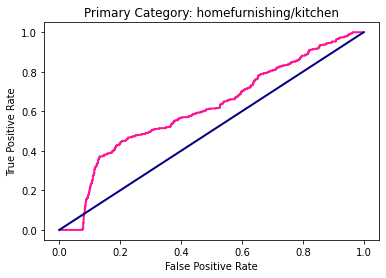

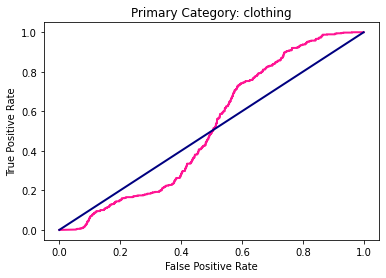

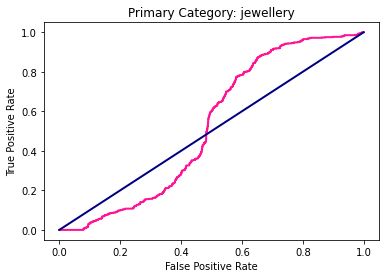

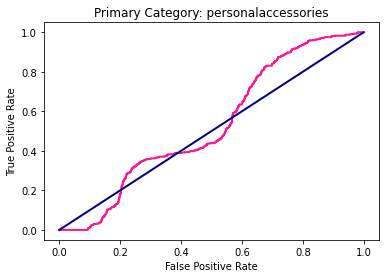

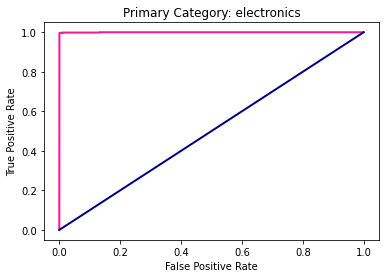

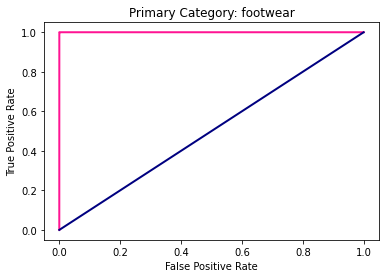

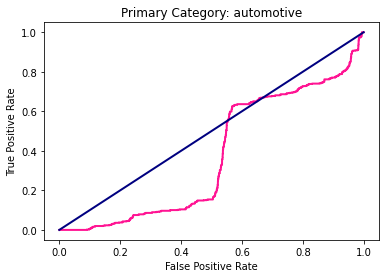

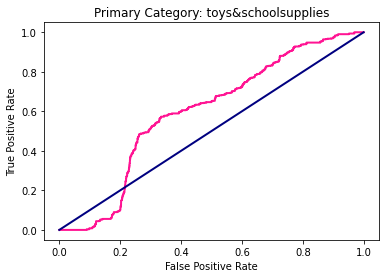

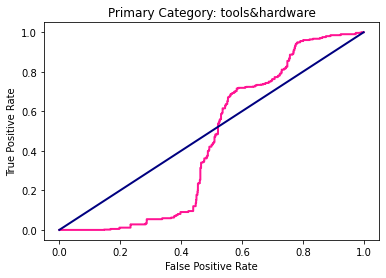

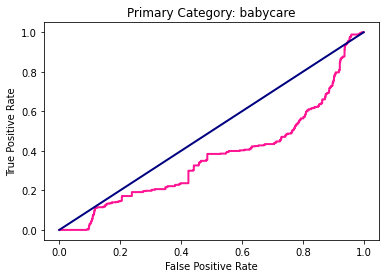

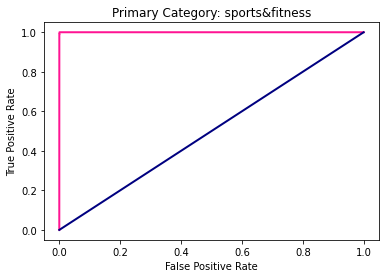

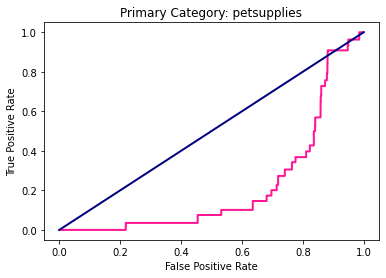

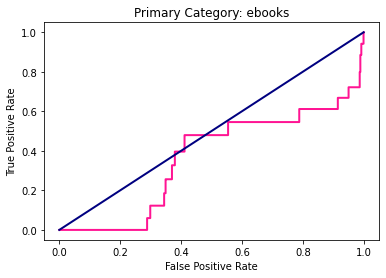

In [96]:
plot_roc_curve(y_test, lr_pred_prob)

**Average Area Under the Curve**

The aggregate area under the curve score that is averaged across all of the One VS Rest curves is calculated below. 

In [36]:
auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.5807850751245784


**3) Evaluation using the Multinomial Naive Bayes Classifier**

In [37]:
print("********** NAIVE BAYES CLASSIFIER **********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********** NAIVE BAYES CLASSIFIER **********
Validation Accuracy:  0.9602564102564103


*********** CONFUSION MATRIX **************
[[551   0   0   0   2   0   0   0   2   0   3   0   0]
 [  1 557  15   0   0   0   9   0   0   7   4   0   8]
 [  0  41 523   0   0   0   2   0   0   1   0   0   0]
 [  0   0   0 636   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 592   0   0   0  15   0   2   0   3]
 [  0   0   1   0   0 601   0   0   0   0   0   0   0]
 [ 13  44   0   0   7   1 482   0   2   6   3   8   9]
 [  0   0   1   0   0   0   2 597   3   1   0   0   0]
 [  0   3   0   0   1   0   3   0 538   2  16   0   4]
 [  0   0   0   0   0   0   0   0   0 622   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 635   0   0]
 [  0   0   0   0   6   0   7   0   0   4   0 591   0]
 [  2   0   0   0  11   0   3   0   4   6  17   3 565]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.97   

**4) Evaluation using Linear Support Vector Machine**

In [38]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9958974358974358


*********** CONFUSION MATRIX **************
[[558   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 601   0   0   0   0   0   0   0   0   0   0   0]
 [  0   7 560   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0 636   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 613   0   1   0   0   0   0   0   0]
 [  0   0   0   0   0 602   0   0   0   0   0   0   0]
 [  1   6   0   0   2   0 559   0   0   0   1   2   4]
 [  0   1   0   0   1   0   0 601   1   0   0   0   0]
 [  0   1   0   0   0   0   1   0 562   0   2   1   0]
 [  0   0   0   0   0   0   0   0   0 622   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 635   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 608   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 611]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       1.00      1.00      1

**5) Evaluation using Decision Trees Classifier**

In [39]:
print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.6883333333333334


*********** CONFUSION MATRIX **************
[[499   0   0   0  12   0  25   1   3   2  11   2   3]
 [ 13 323  34   0   5   0 202   0   9   2   9   0   4]
 [  9   4 494   1   0   5  35   4  12   0   0   2   1]
 [305   0   0 295   0   0   0   0  36   0   0   0   0]
 [ 46   0   1   2 245   2  72   0 241   2   0   2   1]
 [  8   0  17   0   0 356  18   0 200   0   3   0   0]
 [ 38   4   3   0   1   0 488   1  13   2   6  12   7]
 [  2  20   3   0   1   1  30 332 203   0   0   1  11]
 [ 32   0   4   0   9   0  72   7 432   0   2   6   3]
 [  0   0   0   0   0   0  42   0   0 580   0   0   0]
 [ 29   0  38   0   0   0 171   0   4   0 382   0  11]
 [  6   0   0   0   0   0  56   0   1   0  13 532   0]
 [ 28   8   4   0   0   0 110   3  29   9   3   6 411]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0

**6) Evaluation using the Random Forest Classifier**

In [40]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9367948717948718


*********** CONFUSION MATRIX **************
[[546   0   0   0   2   0   0   0   1   0   1   5   3]
 [  0 488  12   0   0   3  77   0   3   0   1  17   0]
 [  0   5 554   0   0   0   3   0   0   0   0   5   0]
 [  0   0   0 636   0   0   0   0   0   0   0   0   0]
 [  2   0   0   0 570   0  12   0   2   0   5  18   5]
 [  0   0   0   0   2 600   0   0   0   0   0   0   0]
 [  4   0   1   0   0   1 465   3   2   0   2  94   3]
 [  0   0   1   0   5  10   0 575  13   0   0   0   0]
 [  1   1   3   0   7   2   7   0 501   0   5  38   2]
 [  0   0   0   0   0   0   0   0   0 600   0  22   0]
 [  0   0   0   0   0   0   2   0   0   0 624   9   0]
 [  0   0   0   0   0   0  15   0   0   1   0 589   3]
 [  5   1   0   0   0   0   7   0  11   0   7  21 559]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.

**7) Evaluation using the K Nearest Neighbours Model**

In [41]:
print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.98


*********** CONFUSION MATRIX **************
[[548   3   0   0   2   1   0   2   0   0   0   1   1]
 [  0 590   0   0   0   0   6   0   0   3   2   0   0]
 [  0  30 533   0   0   2   0   1   0   0   1   0   0]
 [  0   0   0 636   0   0   0   0   0   0   0   0   0]
 [  4   0   0   0 589  16   0   0   0   0   0   0   5]
 [  0   0   1   0   1 598   0   2   0   0   0   0   0]
 [  2   4   0   0   2   3 542   7   2   0   1   7   5]
 [  0   0   1   0   0   1   0 599   3   0   0   0   0]
 [  1   1   2   0   0  14   0   2 538   0   6   0   3]
 [  0   0   0   0   0   0   0   0   0 622   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 635   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0 607   0]
 [  1   0   0   0   0   1   1   0   0   0   0   1 607]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      0.98      

## **PART 3) Reading the Balanced Dataset created using the Undersampling & Resampling Technique**

The dataset that was balanced using the undersampling technique (implemented uusing resampling) that was saved from the earlier [Notebook](https://colab.research.google.com/drive/1Ht6pbVFlkudK7PzrDPmepiytHxPyhVBe?usp=sharing) in the form of a csv file is loaded below in the form of a Pandas dataframe. This dataset consists consists of only those products which belong to the 13 primary categories (no noise). The Product Description in this dataset has also already been cleaned in the previous notebook (lowercasing, stopword removal, tokenization,lemmatization, etc).

In [42]:
undersampled_df = pd.read_csv("/content/drive/MyDrive/Flipkart Product Dataset/undersampling_balanced_products.csv")
undersampled_df

,Unnamed: 0,product_name,product_category_tree,description,brand,primary_categories,main_category,desc_pol,desc_len,cleaned_desc
0,0,Northern Lights Striped Men's Round Neck T-Shirt,"[""Clothing >> Men's Clothing >> T-Shirts >> No...",Northern Lights Striped Men's Round Neck T-Shi...,NaN,clothing,1,-0.007143,232,northern light striped men round neck tshirt b...
1,1,ShowTime Women's T-Shirt Bra,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",ShowTime Women's T-Shirt Bra - Buy Black ShowT...,Black,clothing,1,0.058333,185,showtime woman tshirt bra buy black showtime w...
2,2,Cotton Fab Printed Women's Maternity Wear Kurti,"[""Clothing >> Women's Clothing >> Maternity We...",Key Features of Cotton Fab Printed Women's Mat...,Cotton Fab,clothing,1,0.316667,319,key feature cotton fab printed woman maternity...
3,3,Inmark Men's Checkered Formal Shirt,"[""Clothing >> Men's Clothing >> Shirts >> Form...",Inmark Men's Checkered Formal Shirt\n ...,Regular,clothing,1,0.167262,861,inmark men checkered formal shirt price put co...
4,4,killys Men's Solid No Show Socks,"[""Clothing >> Men's Clothing >> Accessories & ...",Key Features of killys Men's Solid No Show Soc...,killys,clothing,1,0.158333,280,key feature killys men solid show sock cotton ...
...,...,...,...,...,...,...,...,...,...,...
12155,12155,Wallmantra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Large Vinyl Stickers Sticker fo...,Wallmantra,babycare,1,0.371429,210,buy wallmantra large vinyl sticker sticker onl...
12156,12156,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...
12157,12157,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...
12158,12158,Wallmantra Extra Large Vinyl Stickers Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",Buy Wallmantra Extra Large Vinyl Stickers Stic...,Wallmantra,babycare,1,0.278571,222,buy wallmantra extra large vinyl sticker stick...


## **Evaluation of the ML Model on Balanced (Undersampling) testing dataset**

The 6 ML algorithms are then trained on the undersampled balanced dataset and evaluated on the testing dataset. Evaluation metrics are printed in order to ease the process of comparison to find which dataset and model works the best.

In [43]:
x = undersampled_df['cleaned_desc']
y = undersampled_df['primary_categories']

**1) Evaluation using the Logistic Regression Model**

In [44]:
print("********** LOGISTIC REGRESSION **********")
y_test, lr_predict, lr_pred_prob = logistic_regression(x,y)

********** LOGISTIC REGRESSION **********
Validation Accuracy:  0.9486019736842105


*********** CONFUSION MATRIX **************
[[203   0   0   0   2   0   1   0   0   0   1   0   0]
 [  0  57   1   0   0   2   4   0   2   0   1   0   1]
 [  0   3 346   0   0   0   3   0   1   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0   1   0   0]
 [  3   0   0   0 218   0   0   0   0   0   1   0   1]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  1  10   0   0  11   3 457   0   5   0   1   3   5]
 [  0   0   0   0   2   0   1 333   1   0   0   0   0]
 [  0   0   3   0   1   1   4   2 295   0   5   0   1]
 [  0   0   0   0   0   0   0   0   0   3   0   0   3]
 [  0   0   1   0   0   1   1   0   4   0  23   0   0]
 [  3   0   0   0   0   0   4   0   0   0   1  66   1]
 [  2   0   0   0   2   2   4   0   3   0   2   0  82]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.96      

**2) Evaluation using the Multiclass Variant of Logistic Regression Model**

In [78]:
print("********** LOGISTIC REGRESSION MULTICLASS **********")
y_test, lr_predict, lr_pred_prob = logistic_regression_multiclass(x,y)

********** LOGISTIC REGRESSION MULTICLASS **********
Validation Accuracy:  0.9654605263157895


*********** CONFUSION MATRIX **************
[[205   0   0   0   0   0   1   0   0   0   1   0   0]
 [  0  59   1   0   0   0   4   0   2   0   0   0   2]
 [  0   4 347   0   0   0   2   0   0   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0 220   0   0   0   0   0   1   0   0]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  1  10   1   0   6   0 468   0   3   0   1   2   4]
 [  0   0   0   0   2   0   1 333   1   0   0   0   0]
 [  0   0   1   0   1   0   3   1 300   0   4   0   2]
 [  0   0   0   0   0   0   0   0   0   6   0   0   0]
 [  0   0   1   0   0   0   0   0   2   0  27   0   0]
 [  0   0   0   0   0   0   3   0   0   0   1  71   0]
 [  0   0   0   0   4   0   3   0   1   0   2   0  87]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive      

### **Plotting the ROC Curves for each of the 13 categories and calculating the AUC score for them**

In [79]:
print("TESTING LABELS: {}".format(y_test.shape))
print("PREDICTED LABELS: {}".format(lr_predict.shape))
print("PROBABILITY OF THE PREDICTED LABELS: {}".format(lr_pred_prob.shape))

TESTING LABELS: (2432,)
PREDICTED LABELS: (2432,)
PROBABILITY OF THE PREDICTED LABELS: (2432, 13)


In [80]:
#converting the Test Classes (y_test) from Pandas Series object to Numpy array
y_test = y_test.to_numpy()
length = y_test.shape

#conerting the string classes into the respective numbers based on their mapping as described previously
for i in range(length[0]):
  y_test[i] = reverse_category_mapping[y_test[i]]
  lr_predict[i] = reverse_category_mapping[lr_predict[i]]

print("The last 10 actual labels: {}".format(y_test[:10]))
print("The last 10 predicted labels: {}".format(lr_predict[:10]))

The last 10 actual labels: [3 6 0 8 0 3 0 0 5 2]
The last 10 predicted labels: [3 10 0 8 0 3 0 0 5 2]


In [81]:
#converting the actual test labels into a binary 2d numpy array according to their classes

n_classes = 13
temp_array = [[0 for i in range(n_classes)] for i in range(length[0])]

j=0
for i in y_test:
  temp_array[j][i] = 1
  j+=1

#converting the temporary array into a numpy array 
y_test = np.array(temp_array)
print(y_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]


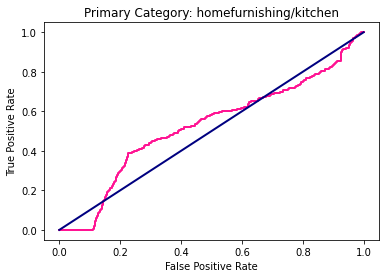

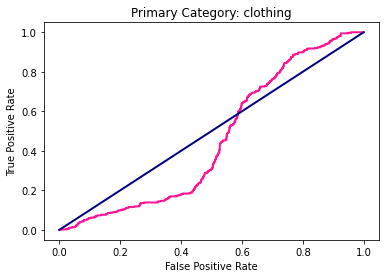

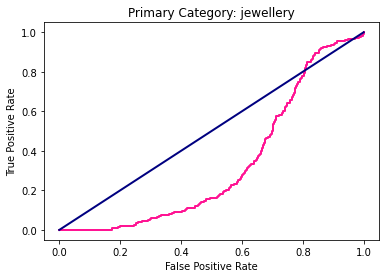

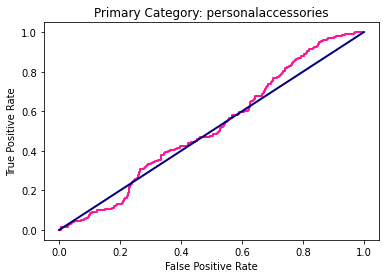

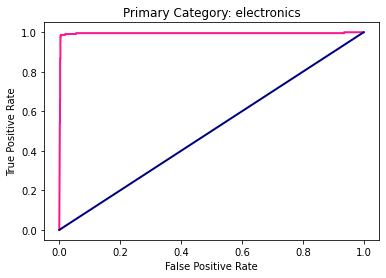

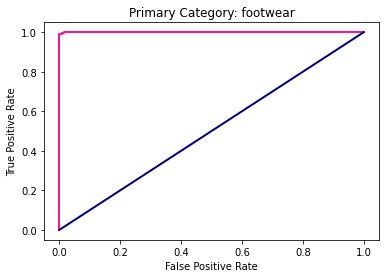

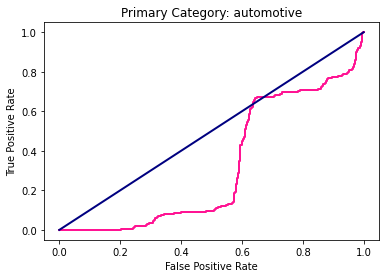

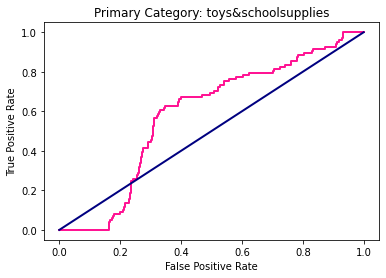

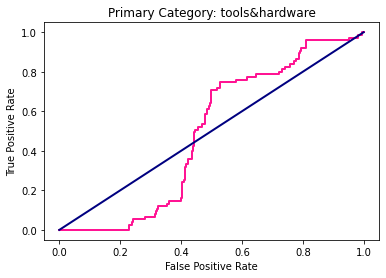

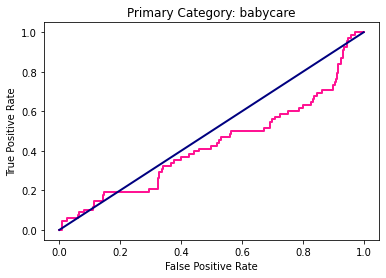

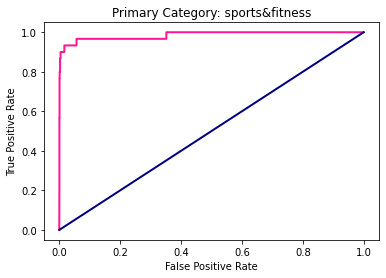

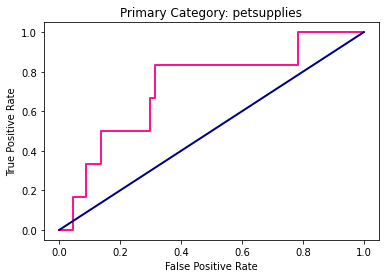

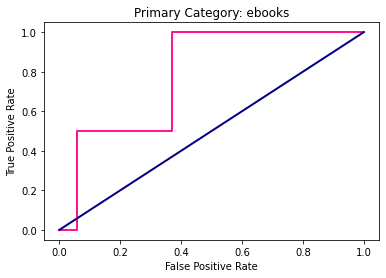

In [82]:
plot_roc_curve(y_test, lr_pred_prob)

**Average Area Under the Curve**

The aggregate area under the curve score that is averaged across all of the One VS Rest curves is calculated below. 

In [50]:
auc = roc_auc_score(y_test, lr_pred_prob, multi_class='ovr')
print('Average AUC score for all the categories is {}'.format(auc))

Average AUC score for all the categories is 0.625892548715162


**3) Evaluation using the Multinomial Naive Bayes Classifier**

In [51]:
print("********** NAIVE BAYES CLASSIFIER **********")
y_test, nb_predict, nb_pred_prob = naive_bayes(x,y)

********** NAIVE BAYES CLASSIFIER **********
Validation Accuracy:  0.9054276315789473


*********** CONFUSION MATRIX **************
[[195   0   0   0   3   0   6   0   3   0   0   0   0]
 [  0   0  35   0   0   0  30   0   3   0   0   0   0]
 [  0   0 349   0   0   0   4   0   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   1   0   0   0   0]
 [  1   0   0   0 200   0   6   0  16   0   0   0   0]
 [  0   0   1   0   0 222   1   1   1   0   0   0   0]
 [  1   1   0   0   7   0 484   1   2   0   0   0   0]
 [  0   0   1   0   0   0   3 333   0   0   0   0   0]
 [  0   0   2   0   2   0  15   2 291   0   0   0   0]
 [  1   0   0   0   0   0   5   0   0   0   0   0   0]
 [  1   0   2   0   1   1   9   0  16   0   0   0   0]
 [  2   0   0   0   1   0  12   0   1   0   0  59   0]
 [  0   0   0   0   3   0  17   0   8   0   0   0  69]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.97   

**4) Evaluation using Linear Support Vector Machine**

In [52]:
print("********* LINEAR SVM *********")
y_test, svm_predict = linear_svm(x,y)

********* LINEAR SVM *********
Validation Accuracy:  0.9749177631578947


*********** CONFUSION MATRIX **************
[[206   0   0   0   0   0   1   0   0   0   0   0   0]
 [  0  59   1   0   0   0   5   0   2   0   0   0   1]
 [  0   2 349   0   0   1   1   0   0   0   0   0   0]
 [  0   0   0   1   0   0   1   0   0   0   0   0   0]
 [  2   0   0   0 221   0   0   0   0   0   0   0   0]
 [  0   0   1   0   1 224   0   0   0   0   0   0   0]
 [  0   5   1   0   5   0 479   0   2   0   1   1   2]
 [  0   0   0   0   0   0   1 335   1   0   0   0   0]
 [  0   0   1   0   1   0   4   0 303   0   2   0   1]
 [  0   0   0   0   0   0   0   0   0   5   0   0   1]
 [  0   0   1   0   0   0   0   0   2   0  27   0   0]
 [  0   0   0   0   0   0   3   0   0   0   0  71   1]
 [  0   0   0   0   1   0   3   0   1   0   1   0  91]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.99      1.00      0

**5) Evaluation using Decision Trees Classifier**

In [53]:
print("********** DECISION TREES CLASSIFIER *************")
y_test, dtree_predict, dtree_pred_prob = decision_trees(x,y)

********** DECISION TREES CLASSIFIER *************
Validation Accuracy:  0.7561677631578947


*********** CONFUSION MATRIX **************
[[169   0   0   0   1   0   2   0   5   0   1  27   2]
 [ 13  40   3   0   1   0   9   0   2   0   0   0   0]
 [  3   3 313   0   1   5   8   0  19   0   1   0   0]
 [  1   0   0   0   0   0   1   0   0   0   0   0   0]
 [ 17   0   0   0 154   0  29   2   5   0   0   5  11]
 [  0   0   5   0  84 135   2   0   0   0   0   0   0]
 [ 86   5   2   0   3   0 378   4   8   0   1   1   8]
 [  0   0   1   0  49   0   5 276   3   0   2   0   1]
 [  8   0   7   0  23   0  28   0 234   0   9   0   3]
 [  2   0   0   0   0   0   4   0   0   0   0   0   0]
 [  1   0   0   0   0   1  10   0   4   0  13   0   1]
 [  5   0   0   0   0   0   9   0   1   0   0  60   0]
 [  7   0   0   0   8   0  12   1   2   0   0   0  67]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0

**6) Evaluation using the Random Forest Classifier**

In [54]:
print("********** RANDOM FOREST CLASSIFIER *************")
y_test, rfc_predict, rfc_pred_prob = random_forest(x,y)

********** RANDOM FOREST CLASSIFIER *************
Validation Accuracy:  0.9235197368421053


*********** CONFUSION MATRIX **************
[[201   0   0   0   0   0   4   0   2   0   0   0   0]
 [  0  29   9   0   0   0  27   0   3   0   0   0   0]
 [  0   0 346   0   0   0   6   0   1   0   0   0   0]
 [  0   0   0   0   0   0   2   0   0   0   0   0   0]
 [  1   0   0   0 204   0  15   0   3   0   0   0   0]
 [  0   0   5   0   5 212   4   0   0   0   0   0   0]
 [  0   0   0   0   6   0 489   1   0   0   0   0   0]
 [  0   0   0   0   8   0   2 326   1   0   0   0   0]
 [  0   0   3   0   4   0  21   0 284   0   0   0   0]
 [  0   0   0   0   0   0   5   0   0   1   0   0   0]
 [  0   0   1   0   0   1  12   0   1   0  15   0   0]
 [  0   0   0   0   0   0   9   0   1   0   0  65   0]
 [  0   0   0   0   5   0  14   0   4   0   0   0  74]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       1.

**7) Evaluation using the K Nearest Neighbours Model**

In [55]:
print("********** K NEAREST NEIGHBOURS *************")
y_test, knn_predict, knn_pred_prob = k_nearest_neighbours(x,y)

********** K NEAREST NEIGHBOURS *************
Validation Accuracy:  0.9453125


*********** CONFUSION MATRIX **************
[[204   0   0   0   0   0   2   0   1   0   0   0   0]
 [  0  57   3   0   1   1   3   0   1   0   0   1   1]
 [  0  10 342   0   0   0   0   0   1   0   0   0   0]
 [  0   0   0   1   0   0   0   1   0   0   0   0   0]
 [  5   0   0   0 205  12   0   0   0   0   0   0   1]
 [  0   0   0   0   0 222   0   2   2   0   0   0   0]
 [  1   3   0   0   6   3 463   8   2   0   2   5   3]
 [  0   0   1   0   0   0   1 334   1   0   0   0   0]
 [  0   0   0   0   0  11   2   2 291   0   4   0   2]
 [  0   0   0   0   0   0   1   0   0   4   0   0   1]
 [  1   0   1   0   0   1   0   0   5   0  22   0   0]
 [  1   0   0   0   1   0   4   0   0   0   0  68   1]
 [  1   0   0   0   2   1   2   1   4   0   0   0  86]]


*********** CLASSIFICATION REPORT **************
                        precision    recall  f1-score   support

            automotive       0.96      0.99 